In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import requests
import PIL
import sklearn
from pathlib import Path
from PIL import Image
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_dir = '/content/drive/MyDrive/Plant_Disease_Detection/train/'

In [4]:
import numpy as np
import cv2
img_height, img_width = 180, 180

data= []
output= []
for ind, i in enumerate(os.listdir(data_dir)):
    print(f"Processing directory: {i}")
    dir_path = os.path.join(data_dir, i)
    for ind2, j in enumerate(os.listdir(dir_path)):
        img_path = os.path.join(dir_path, j)
        img = cv2.imread(img_path)
        if img is not None:
            # Resize the image before appending
            img_resized = cv2.resize(img, (img_width, img_height))
            data.append(img_resized)
            output.append(i)
        else:
            print(f"Failed to load image: {img_path}")

Processing directory: 8
Processing directory: 37
Processing directory: 34
Processing directory: 4
Processing directory: 35
Processing directory: 7
Processing directory: 6
Processing directory: 5
Processing directory: 36
Processing directory: 9
Processing directory: 3
Processing directory: 31
Processing directory: 25
Processing directory: 32
Processing directory: 30
Processing directory: 28
Processing directory: 33
Processing directory: 29
Processing directory: 26
Processing directory: 27
Processing directory: 21
Processing directory: 2
Processing directory: 22
Processing directory: 18
Processing directory: 24
Processing directory: 16
Processing directory: 23
Processing directory: 19
Processing directory: 17
Processing directory: 20
Processing directory: 12
Processing directory: 11
Processing directory: 10
Processing directory: 0
Processing directory: 14
Processing directory: 13
Processing directory: 1
Processing directory: 15


In [24]:
img_height, img_width = 180, 180
batch_size = 32

data_train = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)

Found 8761 files belonging to 38 classes.


[[[ 6  8  7]
  [ 0  3  2]
  [ 7  9  8]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 1  3  1]
  [ 3  7  6]
  [ 8 10 10]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  2  1]
  [ 1  2  1]
  [ 8  9 10]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]


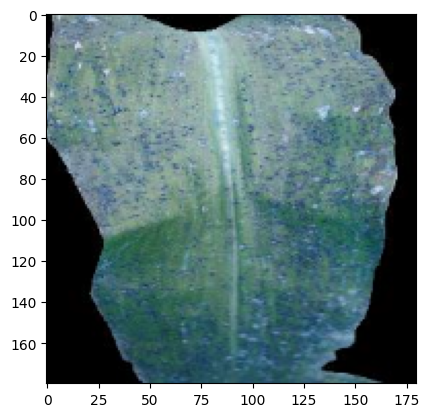

In [5]:
print(data[0])
plt.imshow(data[0])
plt.show()

In [7]:
print(output[0])

8


In [6]:
import random
temp = list(zip(data, output))
random.shuffle(temp)
res1, res2 = zip(*temp)
# res1 and res2 come out as tuples, and so must be converted to lists.
data, output = list(res1),list(res2)

In [7]:
print(data[0],output[0])

[[[135 135 141]
  [136 136 142]
  [138 138 144]
  ...
  [113 113 119]
  [115 115 122]
  [116 116 122]]

 [[133 133 139]
  [135 135 141]
  [139 139 145]
  ...
  [115 115 121]
  [116 116 122]
  [109 109 115]]

 [[135 135 141]
  [137 137 143]
  [138 138 144]
  ...
  [116 116 121]
  [117 117 123]
  [114 114 120]]

 ...

 [[130 132 142]
  [125 128 138]
  [121 124 133]
  ...
  [152 155 160]
  [155 158 163]
  [158 161 166]]

 [[130 132 142]
  [123 125 135]
  [123 125 135]
  ...
  [155 158 163]
  [157 160 165]
  [160 163 168]]

 [[125 126 137]
  [123 125 136]
  [124 126 136]
  ...
  [153 156 161]
  [155 158 163]
  [158 161 166]]] 2


In [8]:
classes={
    'Apple___Apple_scab': 0,
    'Apple___Black_rot': 1,
    'Apple___Cedar_apple_rust': 2,
    'Apple___healthy': 3,
    'Blueberry___healthy': 4,
    'Cherry_(including_sour)___healthy': 5,
    'Cherry_(including_sour)___Powdery_mildew': 6,
    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
    'Corn_(maize)___Common_rust_': 8,
    'Corn_(maize)___healthy': 9,
    'Corn_(maize)___Northern_Leaf_Blight': 10,
    'Grape___Black_rot': 11,
    'Grape___Esca_(Black_Measles)': 12,
    'Grape___healthy': 13,
    'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 14,
    'Orange___Haunglongbing_(Citrus_greening)': 15,
    'Peach___Bacterial_spot': 16,
    'Peach___healthy': 17,
    'Pepper,_bell___Bacterial_spot': 18,
    'Pepper,_bell___healthy': 19,
    'Potato___Early_blight': 20,
    'Potato___healthy': 21,
    'Potato___Late_blight': 22,
    'Raspberry___healthy': 23,
    'Soybean___healthy': 24,
    'Squash___Powdery_mildew': 25,
    'Strawberry___healthy': 26,
    'Strawberry___Leaf_scorch': 27,
    'Tomato___Bacterial_spot': 28,
    'Tomato___Early_blight': 29,
    'Tomato___healthy': 30,
    'Tomato___Late_blight': 31,
    'Tomato___Leaf_Mold': 32,
    'Tomato___Septoria_leaf_spot': 33,
    'Tomato___Spider_mites Two-spotted_spider_mite': 34,
    'Tomato___Target_Spot': 35,
    'Tomato___Tomato_mosaic_virus': 36,
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 37
}
classes_reverse={
    0: 'Apple___Apple_scab',
    1: 'Apple___Black_rot',
    2: 'Apple___Cedar_apple_rust',
    3: 'Apple___healthy',
    4: 'Blueberry___healthy',
    5: 'Cherry_(including_sour)___healthy',
    6: 'Cherry_(including_sour)___Powdery_mildew',
    7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
    8: 'Corn_(maize)___Common_rust_',
    9: 'Corn_(maize)___healthy',
    10: 'Corn_(maize)___Northern_Leaf_Blight',
    11: 'Grape___Black_rot',
    12: 'Grape___Esca_(Black_Measles)',
    13: 'Grape___healthy',
    14: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
    15: 'Orange___Haunglongbing_(Citrus_greening)',
    16: 'Peach___Bacterial_spot',
    17: 'Peach___healthy',
    18: 'Pepper,_bell___Bacterial_spot',
    19: 'Pepper,_bell___healthy',
    20: 'Potato___Early_blight',
    21: 'Potato___healthy',
    22: 'Potato___Late_blight',
    23: 'Raspberry___healthy',
    24: 'Soybean___healthy',
    25: 'Squash___Powdery_mildew',
    26: 'Strawberry___healthy',
    27: 'Strawberry___Leaf_scorch',
    28: 'Tomato___Bacterial_spot',
    29: 'Tomato___Early_blight',
    30: 'Tomato___healthy',
    31: 'Tomato___Late_blight',
    32: 'Tomato___Leaf_Mold',
    33: 'Tomato___Septoria_leaf_spot',
    34: 'Tomato___Spider_mites Two-spotted_spider_mite',
    35: 'Tomato___Target_Spot',
    36: 'Tomato___Tomato_mosaic_virus',
    37: 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'
}

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import InputLayer

# Initialize the model
resnet_model = Sequential()

# Load pre-trained ResNet50 model
pretrained_model = tf.keras.applications.ResNet50(include_top=False,
                                                  input_shape=(180, 180, 3),
                                                  pooling='avg',
                                                  weights='imagenet')

# Freeze the pre-trained layers
for layer in pretrained_model.layers:
    layer.trainable = False

# Add the InputLayer to define the input shape explicitly
resnet_model.add(InputLayer(input_shape=(180, 180, 3)))

# Add the pre-trained ResNet50 model
resnet_model.add(pretrained_model)

# Flatten the output of the ResNet50 model
resnet_model.add(Flatten())

# Add a fully connected layer with Batch Normalization and Dropout
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(BatchNormalization())  # Stabilizes learning
resnet_model.add(Dropout(0.5))          # Helps prevent overfitting

# Adjust the output layer to 38 classes
resnet_model.add(Dense(38, activation='softmax'))

# Compile the model with a smaller learning rate
resnet_model.compile(optimizer=Adam(learning_rate=0.0001),  # Lower learning rate
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

# Print the summary of the model
resnet_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 38)                  │          19,494 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,658,342 (94.06 MB)

 Trainable params: 1,069,606 (4.08 MB)

 Non-trainable params: 23,588,736 (89.98 MB)

In [11]:
for d in data:
  print(d.shape)

Streaming output truncated to the last 5000 lines.
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 

In [12]:
len(data)

8761

In [13]:
len(output)

8761

In [32]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to your output labels
label_encoder.fit(output)

# Transform your output labels to numerical values
numerical_output = label_encoder.transform(output)

# Now you can use numerical_output in your model fitting
epochs = 10
history = resnet_model.fit(x=np.asarray(data), y=numerical_output, epochs=epochs)

Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 30s 72ms/step - accuracy: 0.3938 - loss: 2.6120
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 16s 59ms/step - accuracy: 0.8290 - loss: 0.6322
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.8863 - loss: 0.4003
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.9201 - loss: 0.2920
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 17s 62ms/step - accuracy: 0.9354 - loss: 0.2316
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 17s 62ms/step - accuracy: 0.9474 - loss: 0.1861
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - accuracy: 0.9572 - loss: 0.1535
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.9711 - loss: 0.1184
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - accuracy: 0.9751 - loss: 0.0976
Epoch 10/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - accuracy: 0.9778 - loss: 0.0883


In [36]:
import cv2
image=cv2.imread("0a83add7-dafd-4194-9090-94c92dc55eed.JPG")
image_resized= cv2.resize(image,(180,180))
pred=np.argmax(resnet_model.predict(np.asarray([image_resized])))
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1


In [37]:
output_class=list(classes.keys())[(pred)]
print("The predicted class is", output_class)

The predicted class is Apple___Black_rot


In [47]:
resnet_model.save_weights("Plant_Disease_Detection_ResNet50_weights.weights.h5")

In [33]:
data_dir_test= '/content/drive/MyDrive/Plant_Disease_Detection/test/'

In [38]:
import numpy as np
import cv2
img_height, img_width = 180, 180

data_test = []
output_test = []
for ind, i in enumerate(os.listdir(data_dir_test)):
    print(f"Processing directory: {i}")
    dir_path = os.path.join(data_dir_test, i)
    for ind2, j in enumerate(os.listdir(dir_path)):
        img_path = os.path.join(dir_path, j)
        img = cv2.imread(img_path)
        if img is not None:
            # Resize the image before appending
            img_resized = cv2.resize(img, (img_width, img_height))
            data_test.append(img_resized)
            output_test.append(i)
        else:
            print(f"Failed to load image: {img_path}")

# Convert the list of images to a NumPy array
data_test2 = np.array(data_test)

# Now use the resized data for prediction
predictions = resnet_model.predict(data_test2)

Processing directory: 0
Processing directory: 1
Processing directory: 10
Processing directory: 11
Processing directory: 12
Processing directory: 13
Processing directory: 14
Processing directory: 15
Processing directory: 16
Processing directory: 17
Processing directory: 18
Processing directory: 19
Processing directory: 2
Processing directory: 20
Processing directory: 21
Processing directory: 22
Processing directory: 23
Processing directory: 24
Processing directory: 25
Processing directory: 26
Processing directory: 27
Processing directory: 28
Processing directory: 29
Processing directory: 3
Processing directory: 30
Processing directory: 31
Processing directory: 32
Processing directory: 33
Processing directory: 34
Processing directory: 35
Processing directory: 36
Processing directory: 37
Processing directory: 4
Processing directory: 5
Processing directory: 6
Processing directory: 7
Processing directory: 8
Processing directory: 9
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step


In [39]:
classes_test={
    'Apple___Apple_scab': 0,
    'Apple___Black_rot': 1,
    'Apple___Cedar_apple_rust': 2,
    'Apple___healthy': 3,
    'Blueberry___healthy': 4,
    'Cherry_(including_sour)___healthy': 5,
    'Cherry_(including_sour)___Powdery_mildew': 6,
    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
    'Corn_(maize)___Common_rust_': 8,
    'Corn_(maize)___healthy': 9,
    'Corn_(maize)___Northern_Leaf_Blight': 10,
    'Grape___Black_rot': 11,
    'Grape___Esca_(Black_Measles)': 12,
    'Grape___healthy': 13,
    'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 14,
    'Orange___Haunglongbing_(Citrus_greening)': 15,
    'Peach___Bacterial_spot': 16,
    'Peach___healthy': 17,
    'Pepper,_bell___Bacterial_spot': 18,
    'Pepper,_bell___healthy': 19,
    'Potato___Early_blight': 20,
    'Potato___healthy': 21,
    'Potato___Late_blight': 22,
    'Raspberry___healthy': 23,
    'Soybean___healthy': 24,
    'Squash___Powdery_mildew': 25,
    'Strawberry___healthy': 26,
    'Strawberry___Leaf_scorch': 27,
    'Tomato___Bacterial_spot': 28,
    'Tomato___Early_blight': 29,
    'Tomato___healthy': 30,
    'Tomato___Late_blight': 31,
    'Tomato___Leaf_Mold': 32,
    'Tomato___Septoria_leaf_spot': 33,
    'Tomato___Spider_mites Two-spotted_spider_mite': 34,
    'Tomato___Target_Spot': 35,
    'Tomato___Tomato_mosaic_virus': 36,
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 37
}
classes_reverse_test={
    0: 'Apple___Apple_scab',
    1: 'Apple___Black_rot',
    2: 'Apple___Cedar_apple_rust',
    3: 'Apple___healthy',
    4: 'Blueberry___healthy',
    5: 'Cherry_(including_sour)___healthy',
    6: 'Cherry_(including_sour)___Powdery_mildew',
    7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
    8: 'Corn_(maize)___Common_rust_',
    9: 'Corn_(maize)___healthy',
    10: 'Corn_(maize)___Northern_Leaf_Blight',
    11: 'Grape___Black_rot',
    12: 'Grape___Esca_(Black_Measles)',
    13: 'Grape___healthy',
    14: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
    15: 'Orange___Haunglongbing_(Citrus_greening)',
    16: 'Peach___Bacterial_spot',
    17: 'Peach___healthy',
    18: 'Pepper,_bell___Bacterial_spot',
    19: 'Pepper,_bell___healthy',
    20: 'Potato___Early_blight',
    21: 'Potato___healthy',
    22: 'Potato___Late_blight',
    23: 'Raspberry___healthy',
    24: 'Soybean___healthy',
    25: 'Squash___Powdery_mildew',
    26: 'Strawberry___healthy',
    27: 'Strawberry___Leaf_scorch',
    28: 'Tomato___Bacterial_spot',
    29: 'Tomato___Early_blight',
    30: 'Tomato___healthy',
    31: 'Tomato___Late_blight',
    32: 'Tomato___Leaf_Mold',
    33: 'Tomato___Septoria_leaf_spot',
    34: 'Tomato___Spider_mites Two-spotted_spider_mite',
    35: 'Tomato___Target_Spot',
    36: 'Tomato___Tomato_mosaic_virus',
    37: 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'
}

In [40]:
print(predictions[0])

[7.88864315e-01 3.70418129e-04 1.79638431e-04 4.79237096e-05
 1.31061488e-05 4.86933686e-06 2.74161284e-04 2.73723817e-05
 9.65751184e-04 9.17170837e-05 1.88920421e-06 4.02086516e-06
 8.06486118e-04 7.31187401e-06 5.02499679e-05 2.11467577e-05
 1.30715795e-04 2.00850400e-06 7.55691735e-06 3.73144831e-05
 1.46339618e-04 1.48403473e-04 3.70269731e-06 1.93460047e-01
 8.55555845e-06 7.68632017e-05 6.88923365e-06 1.07745545e-05
 6.46746485e-05 3.96421143e-07 3.73898220e-05 1.21285385e-02
 5.10458158e-05 3.16316959e-06 1.81741838e-03 2.07752528e-05
 2.49344375e-05 8.21150679e-05]


In [41]:
max_indices = [np.argmax(pred) for pred in predictions]
print(max_indices)

[0, 0, 0, 23, 0, 0, 23, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 29, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 23, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 19, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5

In [45]:
label_encoder = LabelEncoder()

# Fit the encoder to your output labels
label_encoder.fit(output_test)

# Transform your output labels to numerical values
numerical_output_test = label_encoder.transform(output_test)
from sklearn.metrics import  classification_report
print(classification_report(numerical_output_test,max_indices))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        49
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        50
           3       1.00      0.92      0.96        89
           4       0.91      1.00      0.95        61
           5       1.00      1.00      1.00        59
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00       145
           8       0.93      0.95      0.94        39
           9       0.95      1.00      0.98        21
          10       0.91      0.79      0.85        38
          11       0.93      0.93      0.93        92
          12       0.88      0.78      0.82         9
          13       0.90      0.89      0.90        53
          14       0.95      0.84      0.89        43
          15       0.75      0.75      0.75        16
          16       1.00      0.86      0.93        29
          17       0.85    